In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
# Grabbing data from the csv file and telling Pandas that the data already contains an index column.
cd = pd.read_csv("C:/Users/cklni/Desktop/WGU/D207/churn_clean.csv", index_col= [0])

In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [4]:
# Generate a contingency table
table = pd.crosstab(cd.Multiple, cd.TechSupport)
print(table)

TechSupport    No   Yes
Multiple               
No           3345  2047
Yes          2905  1703


In [5]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

dof=1
[[3370. 2022.]
 [2880. 1728.]]


In [6]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=3.841, stat=1.031


In [7]:
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [8]:
#interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.310
Independent (fail to reject H0)


In [9]:
#Univariate exploration of continuous MonthlyCharge variable
cd.MonthlyCharge.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

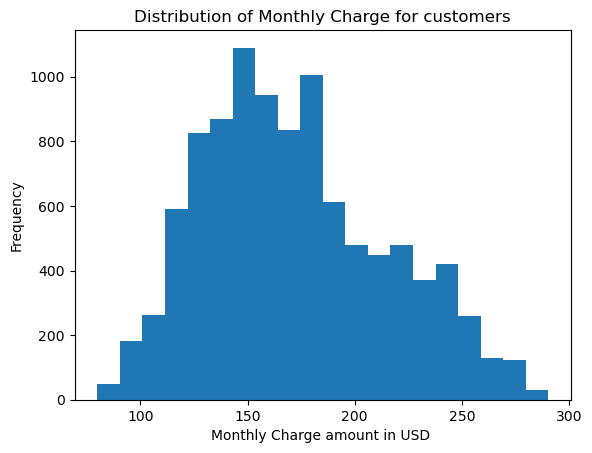

In [10]:
#Visual univariate exploration of continuous MonthlyCharge variable
plt.title('Distribution of Monthly Charge for customers')
plt.hist(data=cd, x="MonthlyCharge", bins = 20)
plt.xlabel('Monthly Charge amount in USD ')
plt.ylabel("Frequency");

In [11]:
#Univariate exploration of continuous Bandwidth_GB_Year variable
cd.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

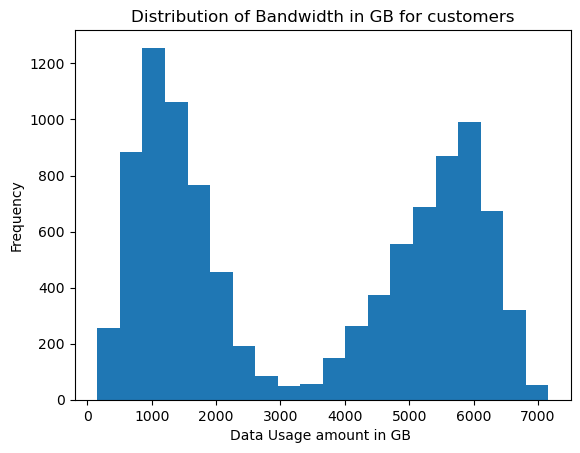

In [12]:
#Visual univariate exploration of continuous Bandwidth_GB_Year variable
plt.title('Distribution of Bandwidth in GB for customers')
plt.hist(data=cd, x="Bandwidth_GB_Year", bins = 20)
plt.xlabel('Data Usage amount in GB ')
plt.ylabel("Frequency");

In [13]:
#Univariate exploration of categorical Contract variable
cd.Contract.value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

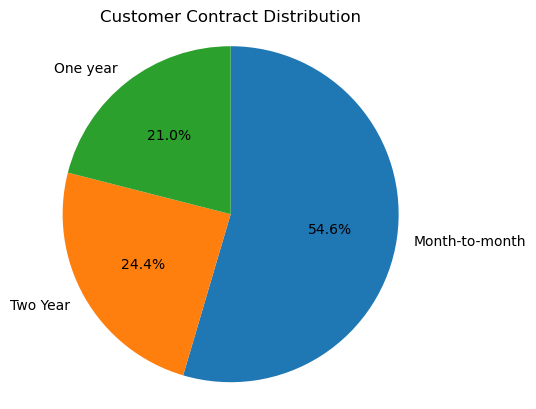

In [14]:
#Visual univariate exploration of categorical Contract variable
plt.title("Customer Contract Distribution")
contract_counts = cd["Contract"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

In [15]:
#Univariate exploration of categorical InternetService variable
cd.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

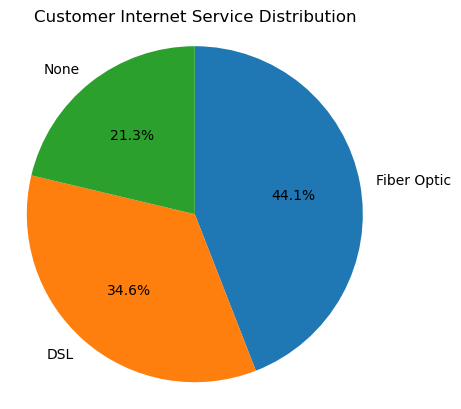

In [16]:
#Visual univariate exploration of categorical InternetService variable
plt.title("Customer Internet Service Distribution")
internetservice_counts = cd["InternetService"].value_counts()
plt.pie(internetservice_counts, labels=internetservice_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

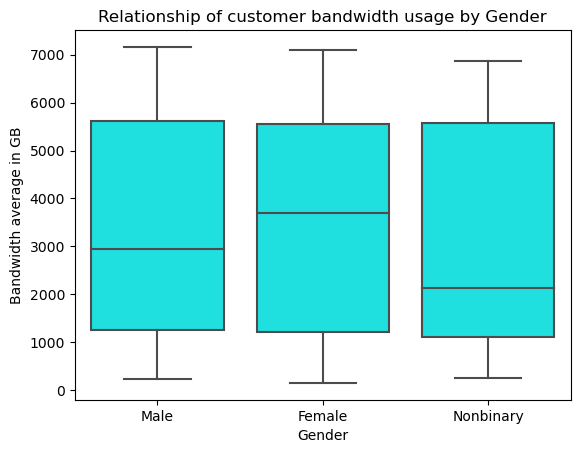

In [17]:
#Visual bivariate exploration of categorical Gender variable use of continuous variable Bandwidth_GB_Year
plt.title("Relationship of customer bandwidth usage by Gender")
sns.boxplot(data=cd, x= "Gender", y = "Bandwidth_GB_Year", color= "cyan")
plt.xlabel("Gender")
plt.ylabel("Bandwidth average in GB");

In [18]:
#Bivariate exploration of categorical Gender variable use of continuous variable Bandwidth_GB_Year 
genderband = cd.groupby('Gender')['Bandwidth_GB_Year'].describe()
print(genderband)

            count         mean          std         min          25%  \
Gender                                                                 
Female     5025.0  3386.778194  2183.820279  155.506715  1211.694229   
Male       4744.0  3407.806575  2184.934935  246.039373  1262.502715   
Nonbinary   231.0  3195.760522  2223.911672  249.357981  1116.050481   

                   50%          75%          max  
Gender                                            
Female     3692.038737  5553.300748  7084.802797  
Male       2937.532982  5616.469368  7158.981530  
Nonbinary  2140.114560  5580.788073  6872.209499  


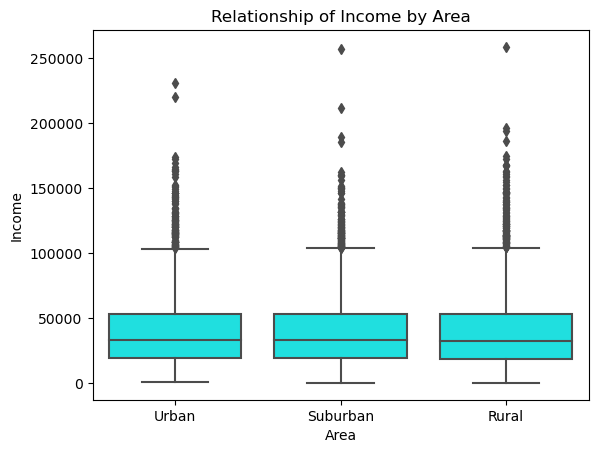

In [19]:
#Visual bivariate exploration of categorical Area variable earnings of continuous variable Income
plt.title("Relationship of Income by Area")
sns.boxplot(data=cd, x= "Area", y = "Income", color= "cyan")
plt.xlabel("Area")
plt.ylabel("Income");

In [20]:
#Bivariate exploration of categorical Area variable earnings of continuous variable Income 
areain = cd.groupby('Area')['Income'].describe()
print(areain)

           count          mean           std     min         25%       50%  \
Area                                                                         
Rural     3327.0  39667.125044  28693.932141  630.24  18894.4600  32855.22   
Suburban  3346.0  39909.151261  27898.018222  348.67  19361.4775  33346.08   
Urban     3327.0  39843.920219  28010.859539  901.21  19593.8750  33362.41   

                75%       max  
Area                           
Rural     53172.905  258900.7  
Suburban  53406.440  256998.4  
Urban     53288.885  231252.0  
